###
# Instacart Shopper Experiment

###
### Context
In this simulated dataset, we have been running an A/B test on our shopper hiring funnel to see if initiating the required applicant background check earlier in the process would improve conversion rates. The theory is that shoppers will maintain their momentum and be more likely to start (and start more quickly) if the required pre-requisites are completed faster.

The background check costs us $30 to complete. A shopper must both activate the prepaid debit card we mail to them (to use when paying for groceries purchased for our customers) and have successfully passed their background check to complete their first batch of orders. Completing the online orientation, however, is optional.

In this scenario, “success” for our shopper recruiting funnel is achieved if they complete their first batch (see “first_batch_completed_date”)

### Questions
Based on this data, what can we conclude at this point from the A/B test (in which we tried initiating the background check earlier in the hiring process for the treatment shoppers)? And how confident should we be in this conclusion?

We'd like to know if this change is cost-effective. How should we think about the cost-effectiveness of this change? Please be as specific as you can here What other observations and recommendations do you have for us, based on this data? (for example, what else did you find that seems relevant, or what else would you want to test if we ran an additional experiment?)

### Deliverables
Please summarize your findings and recommendations in approximately three slides aimed at a decision-making audience. You can include additional content in an appendix
In addition, please attach any code and/or workbooks needed to show your work, so we can understand how you came to the conclusions you did

### Final Note
If you are invited to interview on-site, you will present this deck to a small group of team members and answer questions about it


# Question1 
Based on this data, what can we conclude at this point from the A/B test (in which we tried initiating the background check earlier in the hiring process for the treatment shoppers)? And how confident should we be in this conclusion?


# Data exploratory

In [103]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# read file
df = pd.read_csv('application.csv')

# check dataset
df.head(20)

,applicant_id,channel,group,city,event,event_date
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01
1,10002,social-media,control,Midgard,application_date,2018-10-01
2,10003,web-search-engine,treatment,Midgard,application_date,2018-10-01
3,10004,social-media,treatment,Asgard,application_date,2018-10-01
4,10005,social-media,treatment,Midgard,application_date,2018-10-01
5,10006,job-search-site,control,Asgard,application_date,2018-10-01
6,10007,social-media,control,Midgard,application_date,2018-10-01
7,10008,web-search-engine,control,Asgard,application_date,2018-10-01
8,10009,social-media,control,Helheim,application_date,2018-10-01
9,10010,job-search-site,control,Asgard,application_date,2018-10-01


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108328 entries, 0 to 108327
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   applicant_id  108328 non-null  int64 
 1   channel       108328 non-null  object
 2   group         108328 non-null  object
 3   city          108328 non-null  object
 4   event         108328 non-null  object
 5   event_date    108328 non-null  object
dtypes: int64(1), object(5)
memory usage: 5.0+ MB


In [106]:
# change data type
df['applicant_id'] = df['applicant_id'].astype('object')
df['event_date'] = df['event_date'].astype('datetime64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108328 entries, 0 to 108327
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   applicant_id  108328 non-null  object        
 1   channel       108328 non-null  object        
 2   group         108328 non-null  object        
 3   city          108328 non-null  object        
 4   event         108328 non-null  object        
 5   event_date    108328 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 5.0+ MB


In [107]:
df

,applicant_id,channel,group,city,event,event_date
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01
1,10002,social-media,control,Midgard,application_date,2018-10-01
2,10003,web-search-engine,treatment,Midgard,application_date,2018-10-01
3,10004,social-media,treatment,Asgard,application_date,2018-10-01
4,10005,social-media,treatment,Midgard,application_date,2018-10-01
...,...,...,...,...,...,...
108323,29128,web-search-engine,treatment,Asgard,first_batch_completed_date,2018-11-11
108324,29161,web-search-engine,treatment,Vanaheim,first_batch_completed_date,2018-11-10
108325,29167,shopper-referral-bonus,treatment,Jotunheim,first_batch_completed_date,2018-11-11
108326,29170,shopper-referral-bonus,treatment,Alfheim,first_batch_completed_date,2018-11-11


In [108]:
# explore dataset
df.describe(include='all')

<ipython-input-108-56eb6185847e>:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,applicant_id,channel,group,city,event,event_date
count,108328.0,108328,108328,108328,108328,108328
unique,21698.0,4,2,9,7,42
top,13575.0,web-search-engine,control,Midgard,application_date,2018-11-11 00:00:00
freq,7.0,41632,68750,49648,21698,3625
first,NaN,NaN,NaN,NaN,NaN,2018-10-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,2018-11-11 00:00:00


In [109]:
# check unique sample size

# df.groupby('group').applicant_id.nunique()  # return series

df.groupby('group').agg({'applicant_id': 'nunique'})  # return df

,applicant_id
group,
control,14501
treatment,7197


In [110]:
# check event size

# df.groupby('group').applicant_id.count()
df.groupby('group').agg({'applicant_id': 'count'})  # return df

,applicant_id
group,
control,68750
treatment,39578


In [111]:
# check converstion funnel and its sequence by group

df_control_converstion = df[df['group'] == 'control'].groupby(['group',
                                                               'event']).applicant_id.nunique().sort_values(
    ascending=False)

df_control_converstion

group    event                          
control  application_date                   14501
         card_mailed_date                   14266
         background_check_initiated_date    10836
         card_activation_date               10836
         background_check_completed_date     9456
         orientation_completed_date          5982
         first_batch_completed_date          2873
Name: applicant_id, dtype: int64

In [112]:
df_control_converstion = df_control_converstion.to_frame()

In [113]:
df_control_converstion.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7 entries, ('control', 'application_date') to ('control', 'first_batch_completed_date')
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   applicant_id  7 non-null      int64
dtypes: int64(1)
memory usage: 350.0+ bytes


In [114]:
df_control_converstion

applicant_id
group   event                                        
control application_date                        14501
        card_mailed_date                        14266
        background_check_initiated_date         10836
        card_activation_date                    10836
        background_check_completed_date          9456
        orientation_completed_date               5982
        first_batch_completed_date               2873

In [115]:
df_control_converstion

applicant_id
group   event                                        
control application_date                        14501
        card_mailed_date                        14266
        background_check_initiated_date         10836
        card_activation_date                    10836
        background_check_completed_date          9456
        orientation_completed_date               5982
        first_batch_completed_date               2873

In [116]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y=df_control_converstion.index.get_level_values(1),
    x=df_control_converstion.applicant_id,
    name='control',
    textinfo="value+percent initial"))

fig.show()

In [117]:
df_treat_converstion = df[df['group'] == 'treatment'].groupby(['group', 'event']).applicant_id.nunique().sort_values(
    ascending=False)

print(df_treat_converstion)

df_treat_converstion = df_treat_converstion.to_frame()

fig = go.Figure(go.Funnel(
    y=df_treat_converstion.index.get_level_values(1),
    x=df_treat_converstion.applicant_id,
    name='treatment',
    textinfo="value+percent initial",
    marker=dict(color='rgb(165,0,38)')))

fig.show()

group      event                          
treatment  application_date                   7197
           background_check_initiated_date    7197
           card_mailed_date                   7071
           background_check_completed_date    6384
           card_activation_date               5889
           orientation_completed_date         3369
           first_batch_completed_date         2471
Name: applicant_id, dtype: int64


In [118]:
fig = go.Figure(go.Funnel(
    y=df_control_converstion.index.get_level_values(1),
    x=df_control_converstion.applicant_id,
    name='control',
    textinfo="value+percent initial"))

fig.add_funnel(
    y=df_treat_converstion.index.get_level_values(1),
    x=df_treat_converstion.applicant_id,
    name='treatment',
    textinfo="value+percent initial")

fig.show()

In [119]:
df_concat = pd.concat([df_control_converstion, df_treat_converstion], )
df_concat = df_concat.reset_index()
df_concat

,group,event,applicant_id
0,control,application_date,14501
1,control,card_mailed_date,14266
2,control,background_check_initiated_date,10836
3,control,card_activation_date,10836
4,control,background_check_completed_date,9456
5,control,orientation_completed_date,5982
6,control,first_batch_completed_date,2873
7,treatment,application_date,7197
8,treatment,background_check_initiated_date,7197
9,treatment,card_mailed_date,7071


In [120]:
# check experiment duration
print(df['event_date'].min())
print(df['event_date'].max())

print(df['event_date'].max() - df['event_date'].min())

# the experiment lasted for a month

2018-10-01 00:00:00
2018-11-11 00:00:00
41 days 00:00:00


In [121]:
# transpose the dataset by applicant
df_transpose = df.pivot_table(index=['group', 'applicant_id'],
                              columns='event',
                              values='event_date',
                              aggfunc='max')

# df_transpose.reset_index()
df_transpose

event                  application_date background_check_completed_date  \
group     applicant_id                                                    
control   10001              2018-10-01                             NaT   
          10002              2018-10-01                      2018-10-17   
          10006              2018-10-01                             NaT   
          10007              2018-10-01                      2018-10-11   
          10008              2018-10-01                             NaT   
...                                 ...                             ...   
treatment 31684              2018-11-11                             NaT   
          31686              2018-11-11                             NaT   
          31687              2018-11-11                             NaT   
          31689              2018-11-11                             NaT   
          31691              2018-11-11                             NaT   

event                  background_check_initiated_date card_activation_date  \
group     applicant_id                                                        
control   10001                                    NaT                  NaT   
          10002                             2018-10-12           2018-10-12   
          10006                                    NaT                  NaT   
          10007                             2018-10-07           2018-10-07   
          10008                                    NaT                  NaT   
...                                                ...                  ...   
treatment 31684                             2018-11-11                  NaT   
          31686                             2018-11-11                  NaT   
          31687                             2018-11-11                  NaT   
          31689                             2018-11-11                  NaT   
          31691                             2018-11-11                  NaT   

event                  card_mailed_date first_batch_completed_date  \
group     applicant_id                                               
control   10001              2018-10-01                        NaT   
          10002              2018-10-01                 2018-10-20   
          10006              2018-10-01                        NaT   
          10007              2018-10-02                 2018-10-14   
          10008              2018-10-02                        NaT   
...                                 ...                        ...   
treatment 31684              2018-11-11                        NaT   
          31686              2018-11-11                        NaT   
          31687              2018-11-11                        NaT   
          31689              2018-11-11                        NaT   
          31691                     NaT                        NaT   

event                  orientation_completed_date  
group     applicant_id                             
control   10001                        2018-10-03  
          10002                               NaT  
          10006                               NaT  
          10007                               NaT  
          10008                               NaT  
...                                           ...  
treatment 31684                               NaT  
          31686                               NaT  
          31687                               NaT  
          31689                               NaT  
          31691                               NaT  

[21698 rows x 7 columns]

In [122]:
df_transpose = df_transpose.reset_index()
df_transpose

event,group,applicant_id,application_date,background_check_completed_date,background_check_initiated_date,card_activation_date,card_mailed_date,first_batch_completed_date,orientation_completed_date
0,control,10001,2018-10-01,NaT,NaT,NaT,2018-10-01,NaT,2018-10-03
1,control,10002,2018-10-01,2018-10-17,2018-10-12,2018-10-12,2018-10-01,2018-10-20,NaT
2,control,10006,2018-10-01,NaT,NaT,NaT,2018-10-01,NaT,NaT
3,control,10007,2018-10-01,2018-10-11,2018-10-07,2018-10-07,2018-10-02,2018-10-14,NaT
4,control,10008,2018-10-01,NaT,NaT,NaT,2018-10-02,NaT,NaT
...,...,...,...,...,...,...,...,...,...
21693,treatment,31684,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT
21694,treatment,31686,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT
21695,treatment,31687,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT
21696,treatment,31689,2018-11-11,NaT,2018-11-11,NaT,2018-11-11,NaT,NaT


In [123]:
df_transpose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21698 entries, 0 to 21697
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   group                            21698 non-null  object        
 1   applicant_id                     21698 non-null  int64         
 2   application_date                 21698 non-null  datetime64[ns]
 3   background_check_completed_date  15840 non-null  datetime64[ns]
 4   background_check_initiated_date  18033 non-null  datetime64[ns]
 5   card_activation_date             16725 non-null  datetime64[ns]
 6   card_mailed_date                 21337 non-null  datetime64[ns]
 7   first_batch_completed_date       5344 non-null   datetime64[ns]
 8   orientation_completed_date       9351 non-null   datetime64[ns]
dtypes: datetime64[ns](7), int64(1), object(1)
memory usage: 1.5+ MB


<ipython-input-124-751e5e04dace>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




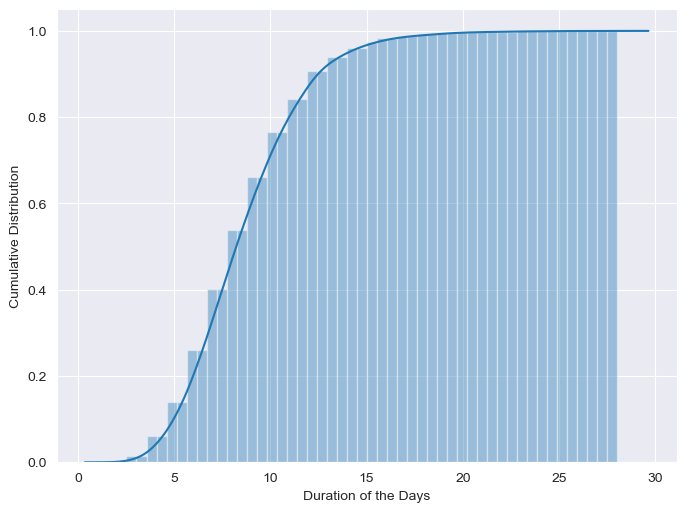

In [124]:
# What's the distribution of the duration of the days between application_date to first_batch_completed_date

plt.figure(figsize=(8, 6), dpi=100)
duration = (df_transpose['first_batch_completed_date'] - df_transpose['application_date'])

sns.distplot(duration[duration.notna()].dt.days,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True)
             )

plt.xlabel('Duration of the Days')
plt.ylabel('Cumulative Distribution')

plt.show()

<ipython-input-125-a331f2bd290d>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

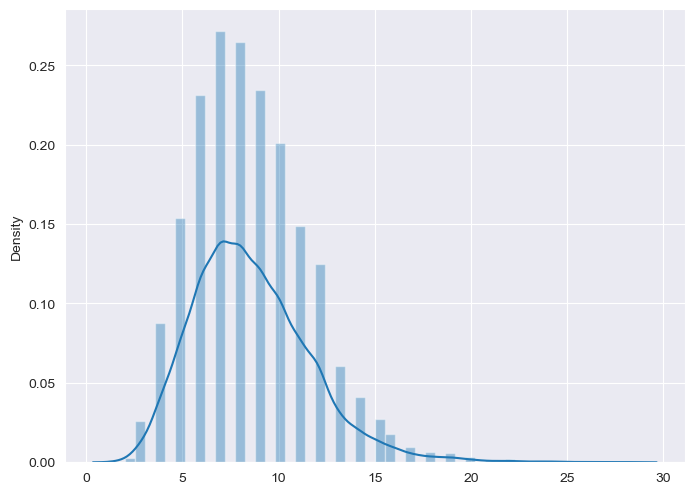

In [125]:
plt.figure(figsize=(8, 6), dpi=100)
sns.distplot(duration[duration.notna()].dt.days)

<ipython-input-126-1c546e5531e6>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




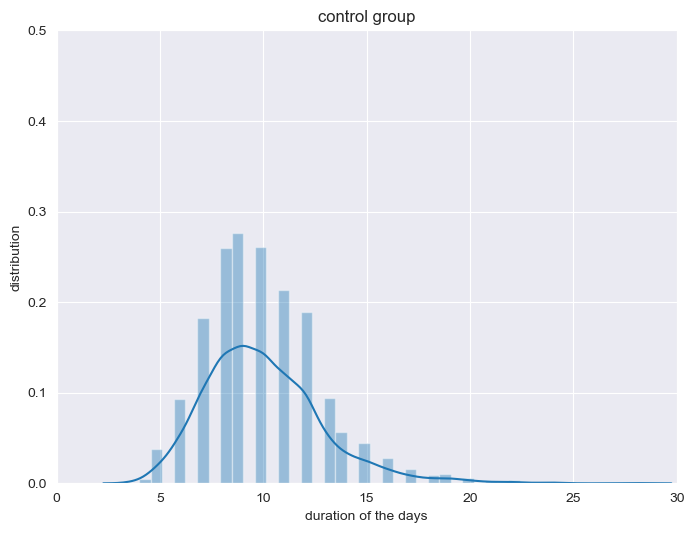

In [126]:
plt.figure(figsize=(8, 6), dpi=100)
duration = (df_transpose[df_transpose.group == 'control']['first_batch_completed_date'] -
            df_transpose[df_transpose.group == 'control']['application_date'])

sns.distplot(duration[duration.notna()].dt.days)

plt.xlabel('duration of the days')
plt.ylabel('distribution')
plt.title('control group')

plt.ylim(0, 0.5)
plt.xlim(0, 30)
plt.show()

<ipython-input-127-2fd93039d81b>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




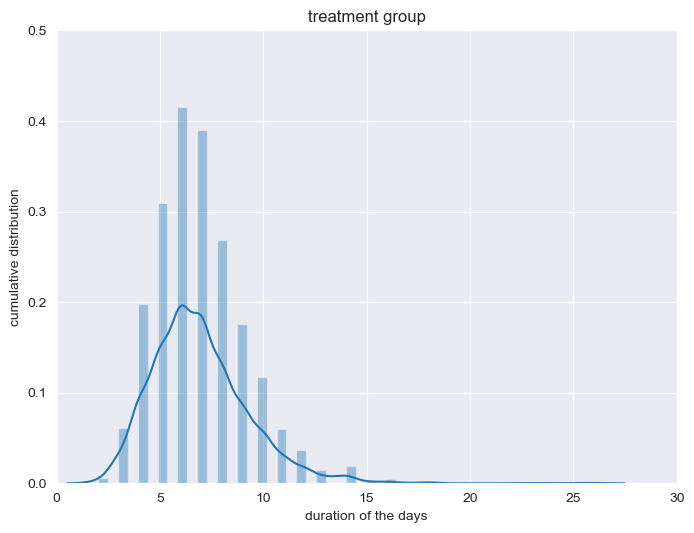

In [127]:
plt.figure(figsize=(8, 6), dpi=100)
duration = (df_transpose[df_transpose.group == 'treatment']['first_batch_completed_date'] -
            df_transpose[df_transpose.group == 'treatment']['application_date'])

sns.distplot(duration[duration.notna()].dt.days)

plt.xlabel('duration of the days')
plt.ylabel('cumulative distribution')
plt.title('treatment group')

plt.ylim(0, 0.5)
plt.xlim(0, 30)
plt.show()

## Population

In [128]:
# defind the conversion windows
# application_date -> first_batch_completed_date

# application date range from [2018-10-01 00:00:00, 2018-10-31 00:00:00]
# 80% -> duration 11 days

qualified_applicant_id = pd.DataFrame(df.loc[(df['event'] == 'application_date')
                                             & (df['event_date'] <= '2018-10-31'), 'applicant_id'].unique())

qualified_applicant_id.columns = ['qualified_applicant_id']

In [129]:
qualified_applicant_id

,qualified_applicant_id
0,10001
1,10002
2,10003
3,10004
4,10005
...,...
14977,24978
14978,24979
14979,24980
14980,24981


In [130]:
len(qualified_applicant_id)

14982

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108328 entries, 0 to 108327
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   applicant_id  108328 non-null  object        
 1   channel       108328 non-null  object        
 2   group         108328 non-null  object        
 3   city          108328 non-null  object        
 4   event         108328 non-null  object        
 5   event_date    108328 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 5.0+ MB


In [132]:
# filter out who are not qualified in this experiment

df = df.merge(qualified_applicant_id, left_on='applicant_id', right_on='qualified_applicant_id',
              how='inner').reset_index(drop=True)

df

,applicant_id,channel,group,city,event,event_date,qualified_applicant_id
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01,10001
1,10001,web-search-engine,control,Asgard,card_mailed_date,2018-10-01,10001
2,10001,web-search-engine,control,Asgard,orientation_completed_date,2018-10-03,10001
3,10002,social-media,control,Midgard,application_date,2018-10-01,10002
4,10002,social-media,control,Midgard,card_mailed_date,2018-10-01,10002
...,...,...,...,...,...,...,...
81870,24982,web-search-engine,treatment,Midgard,card_mailed_date,2018-11-01,24982
81871,24982,web-search-engine,treatment,Midgard,orientation_completed_date,2018-11-05,24982
81872,24982,web-search-engine,treatment,Midgard,card_activation_date,2018-11-03,24982
81873,24982,web-search-engine,treatment,Midgard,background_check_initiated_date,2018-10-31,24982


In [133]:
df = df[['applicant_id', 'channel', 'group', 'city', 'event', 'event_date']]

df

,applicant_id,channel,group,city,event,event_date
0,10001,web-search-engine,control,Asgard,application_date,2018-10-01
1,10001,web-search-engine,control,Asgard,card_mailed_date,2018-10-01
2,10001,web-search-engine,control,Asgard,orientation_completed_date,2018-10-03
3,10002,social-media,control,Midgard,application_date,2018-10-01
4,10002,social-media,control,Midgard,card_mailed_date,2018-10-01
...,...,...,...,...,...,...
81870,24982,web-search-engine,treatment,Midgard,card_mailed_date,2018-11-01
81871,24982,web-search-engine,treatment,Midgard,orientation_completed_date,2018-11-05
81872,24982,web-search-engine,treatment,Midgard,card_activation_date,2018-11-03
81873,24982,web-search-engine,treatment,Midgard,background_check_initiated_date,2018-10-31


In [134]:
# check convertsion funnel

df_control_converstion = df[df['group'] == 'control'].groupby(['group', 'event']).applicant_id.nunique().sort_values(
    ascending=False)

df_control_converstion = df_control_converstion.to_frame()

df_control_converstion

applicant_id
group   event                                        
control application_date                        10024
        card_mailed_date                        10024
        background_check_initiated_date          8582
        card_activation_date                     8582
        background_check_completed_date          8465
        orientation_completed_date               4370
        first_batch_completed_date               2678

In [135]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y=df_control_converstion.index.get_level_values(1),
    x=df_control_converstion.applicant_id,
    name='control',
    textinfo="value+percent initial"))

fig.show()

In [136]:
df_treat_converstion = df[df['group'] == 'treatment'].groupby(['group', 'event']).applicant_id.nunique().sort_values(
    ascending=False)

df_treat_converstion = df_treat_converstion.to_frame()

df_treat_converstion

applicant_id
group     event                                        
treatment application_date                         4958
          background_check_completed_date          4958
          background_check_initiated_date          4958
          card_mailed_date                         4958
          card_activation_date                     4658
          orientation_completed_date               2545
          first_batch_completed_date               2115

In [137]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnel(
    y=df_treat_converstion.index.get_level_values(1),
    x=df_treat_converstion.applicant_id,
    name='treatment',
    textinfo="value+percent initial"))

fig.show()

In [138]:
fig = go.Figure(go.Funnel(
    y=df_control_converstion.index.get_level_values(1),
    x=df_control_converstion.applicant_id,
    name='control',
    textinfo="value+percent initial"))

fig.add_funnel(
    y=df_treat_converstion.index.get_level_values(1),
    x=df_treat_converstion.applicant_id,
    name='treatment',
    textinfo="value+percent initial")

fig.show()

# Checking the invariant metrics
### sample size (self define function)

In [139]:
# sanity check - sample size
# define invariate check function

def invariant_check(test_sample_size, control_sample_size, p_pool, z_score):
    # pooled standard deviation
    p_pool_sd = np.sqrt(p_pool * (1 - p_pool) / (test_sample_size + control_sample_size))

    # margin of error
    margin_error = p_pool_sd * z_score

    control_prop = control_sample_size / (test_sample_size + control_sample_size)

    confidence_interval_lower = p_pool - margin_error
    confidence_interval_upper = p_pool + margin_error

    return confidence_interval_lower, confidence_interval_upper, control_prop


test_sample = df.groupby('group').agg({'applicant_id': 'nunique'}).loc['treatment', 'applicant_id']

control_sample = df.groupby('group').agg({'applicant_id': 'nunique'}).loc['control', 'applicant_id']

lower, upper, control_prop = invariant_check(test_sample, control_sample, 0.5, 1.96)

print('confidence interval lower bounds: {}'.format(lower))
print('confidence interval upper bounds: {}'.format(upper))
print('control proportion: {}'.format(control_prop))

confidence interval lower bounds: 0.4919935281817871
confidence interval upper bounds: 0.5080064718182129
control proportion: 0.6690695501268189


### Result: Doesn't pass the sample size invariate check

# Checking the evaluation metric
### Method1 : Calculate z score for pooled two sample data

In [140]:
import scipy.stats as stats


# choose metrics
# conversion rate = complete first batch / application 
# calculate z score

# define z_score function
def z_score_pool(test_success, control_success, test_sample_size, control_sample_size):
    import numpy as np
    d = test_success / test_sample_size - control_success / control_sample_size
    p_pool = (test_success + control_success) / (test_sample_size + control_sample_size)
    p_pool_sd = np.sqrt(p_pool * (1 - p_pool) * (1 / test_sample_size + 1 / control_sample_size))
    z_score = (d - 0) / p_pool_sd
    return z_score


# Z = (X1 - X2) / sqrt((σ1^2/n1) + (σ2^2/n2))

test_complete = 2115
contrl_complete = 2678
test_sample_size = 4958
control_sample_size = 10024
alpha = 0.05
dmin = 0
# no prtical significant value provided, then we can assume dmin = 0

z = z_score_pool(test_complete, contrl_complete, test_sample_size, control_sample_size)
p_value = (1 - stats.norm.cdf(z))
print('z score is %s > 1.65, so we can reject null hypothesis, and accept alternative hypothesis' % z)
print(
    'or we can say: p value is %s < 0.05, so we can reject null hypothesis, and accept alternative hypothesis' % p_value)

z score is 19.685398121466985 > 1.65, so we can reject null hypothesis, and accept alternative hypothesis
or we can say: p value is 0.0 < 0.05, so we can reject null hypothesis, and accept alternative hypothesis


In [141]:
import numpy as np

# 定义样本大小和成功次数
test_complete = 2115
control_complete = 2678
test_sample_size = 4958
control_sample_size = 10024

# 计算比例
p1 = test_complete / test_sample_size
p2 = control_complete / control_sample_size

# 计算池化比例
p = (test_complete + control_complete) / (test_sample_size + control_sample_size)

# 计算z得分
z = (p1 - p2) / np.sqrt(p * (1 - p) * (1 / test_sample_size + 1 / control_sample_size))
# Z = (X1 - X2) / sqrt((σ1^2/n1) + (σ2^2/n2))

print(z)


19.685398121466985


### Method2 : Calculate z score for unpooled two sample data

In [142]:
import scipy.stats as stats


# choose metrics
# conversion rate = complete first batch / application 
# calculate z score
# define z_score function


def z_score_unpool(test_success, control_success, test_sample_size, control_sample_size):
    import numpy as np
    d = test_success / test_sample_size - control_success / control_sample_size
    p_con = control_success / control_sample_size
    p_test = test_success / test_sample_size
    p_unpool_sd = np.sqrt((p_con * (1 - p_con) / control_sample_size) + (p_test * (1 - p_test) / test_sample_size))
    z_score = (d - 0) / p_unpool_sd
    return z_score


# parameter: 
test_complete = 2115
contrl_complete = 2678
test_sample_size = 4958
control_sample_size = 10024
alpha = 0.05
dmin = 0  # no prtical significant value provided, then we can assume dmin = 0

z = z_score_unpool(test_complete, contrl_complete, test_sample_size, control_sample_size)
p_value = (1 - stats.norm.cdf(z))
print('z score is %s > 1.65, so we can reject null hypothesis, and accept alternative hypothesis' % z)
print(
    'or we can say: p value is %s < 0.05, so we can reject null hypothesis, and accept alternative hypothesis' % p_value)

z score is 19.21083008024871 > 1.65, so we can reject null hypothesis, and accept alternative hypothesis
or we can say: p value is 0.0 < 0.05, so we can reject null hypothesis, and accept alternative hypothesis


Note: If the sample size is big enough, there is not much difference between unpool and pool method

### Method3 : Calculate confidence interval

In [143]:
def confidence_interval(test_success, control_success, test_sample_size, control_sample_size):
    import numpy as np
    p_pool = (test_success + control_success) / (test_sample_size + control_sample_size)
    p_pool_sd = np.sqrt(p_pool * (1 - p_pool) / (test_sample_size + control_sample_size))
    margin_error = p_pool_sd * 1.96
    p_con = control_success / control_sample_size
    p_test = test_success / test_sample_size
    diff = p_test - p_con
    confidence_interval_lower = diff - margin_error
    confidence_interval_upper = diff + margin_error
    return confidence_interval_lower, confidence_interval_upper


#parameters:

# parameter: 
test_complete = 2115
contrl_complete = 2678
test_sample_size = 4958
control_sample_size = 10024
alpha = 0.05
dmin = 0  # no prtical significant value provided, then we can assume dmin = 0

confidence_interval_lower, confidence_interval_upper = confidence_interval(test_complete, contrl_complete,
                                                                           test_sample_size, control_sample_size)
print('confidence interval lower is {}'.format(confidence_interval_lower))
print('confidence interval upper is {}'.format(confidence_interval_upper))
print('confidence interval doesn\'t include 0, so we can reject null hypothesis, and accept alternative hypothesis')

confidence interval lower is 0.15195533610117581
confidence interval upper is 0.16689362566448743
confidence interval doesn't include 0, so we can reject null hypothesis, and accept alternative hypothesis


### Method4 : T test

In [144]:
## metrics2 : t test
## decrease the duration from application to completed first batch

df_transpose = df.pivot_table(index=['group', 'channel', 'applicant_id'], columns='event', values='event_date',
                              aggfunc='max')
df_transpose['duration'] = (df_transpose['first_batch_completed_date'] - df_transpose['application_date']).dt.days
df_transpose = df_transpose.reset_index()
df_transpose

event,group,channel,applicant_id,application_date,background_check_completed_date,background_check_initiated_date,card_activation_date,card_mailed_date,first_batch_completed_date,orientation_completed_date,duration
0,control,job-search-site,10006,2018-10-01,NaT,NaT,NaT,2018-10-01,NaT,NaT,NaN
1,control,job-search-site,10010,2018-10-01,2018-10-08,2018-10-05,2018-10-05,2018-10-02,2018-10-10,NaT,9.0
2,control,job-search-site,10012,2018-10-01,2018-10-09,2018-10-05,2018-10-05,2018-10-02,2018-10-09,NaT,8.0
3,control,job-search-site,10037,2018-10-01,2018-10-07,2018-10-04,2018-10-04,2018-10-02,2018-10-08,NaT,7.0
4,control,job-search-site,10038,2018-10-01,2018-10-07,2018-10-04,2018-10-04,2018-10-02,NaT,2018-10-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14977,treatment,web-search-engine,24960,2018-10-31,2018-11-03,2018-10-31,2018-11-04,2018-10-31,2018-11-06,2018-11-06,6.0
14978,treatment,web-search-engine,24965,2018-10-31,2018-11-03,2018-10-31,2018-11-03,2018-10-31,2018-11-10,2018-11-03,10.0
14979,treatment,web-search-engine,24978,2018-10-31,2018-11-05,2018-10-31,2018-11-05,2018-10-31,NaT,NaT,NaN
14980,treatment,web-search-engine,24979,2018-10-31,2018-11-04,2018-10-31,2018-11-05,2018-10-31,2018-11-06,2018-11-07,6.0


In [145]:
from scipy import stats

test_duration = df_transpose.loc[(df_transpose['group'] == 'treatment')
                                 & (df_transpose['duration'].notnull()), 'duration']

control_duration = df_transpose.loc[(df_transpose['group'] == 'control')
                                    & (df_transpose['duration'].notnull()), 'duration']

print(stats.ttest_ind(control_duration, test_duration))

s, p_value = stats.ttest_ind(control_duration, test_duration)

if p_value < 0.05:
    print('p value is %s < 0.05, so we can reject null hypothesis, and accept alternative hypothesis' % p_value)
else:
    print('p value is %s > 0.05, so we can\'t reject null hypothesis' % p_value)

Ttest_indResult(statistic=39.75542370431981, pvalue=5.822516780864627e-299)
p value is 5.822516780864627e-299 < 0.05, so we can reject null hypothesis, and accept alternative hypothesis


In [146]:
# days from application to first batch completion
df_transpose.groupby('group').agg({'duration': 'mean'})

event,duration
group,
control,10.176251
treatment,7.076123


# Question 2 
- The background check costs us $30 to complete!  
- We'd like to know if this change is cost-effective. How should we think about the cost-effectiveness of this change? Please be as specific as you can here

In [147]:
cost = 30

# formula: cost per success

control = (30 * 8582) / 2678
test = (30 * 4958) / 2115
print(control)
print(test)

96.13890963405527
70.32624113475177


# Question 3

In [148]:
channel_cvr = df_transpose.groupby('channel').agg({'application_date': 'count', 'first_batch_completed_date': 'count'})
channel_cvr['cvr'] = channel_cvr['first_batch_completed_date'] / channel_cvr['application_date']
channel_cvr.head()

event,application_date,first_batch_completed_date,cvr
channel,,,
job-search-site,2625,603,0.229714
shopper-referral-bonus,1991,778,0.390758
social-media,4427,1512,0.341541
web-search-engine,5939,1900,0.319919


In [149]:
channel_cvr_group = df_transpose.groupby(['group', 'channel']).agg(
    {'application_date': 'count', 'first_batch_completed_date': 'count'})
channel_cvr_group['cvr'] = channel_cvr_group['first_batch_completed_date'] / channel_cvr_group['application_date']

In [150]:
channel_cvr_group

event                             application_date  \
group     channel                                    
control   job-search-site                     1765   
          shopper-referral-bonus              1332   
          social-media                        2998   
          web-search-engine                   3929   
treatment job-search-site                      860   
          shopper-referral-bonus               659   
          social-media                        1429   
          web-search-engine                   2010   

event                             first_batch_completed_date       cvr  
group     channel                                                       
control   job-search-site                                279  0.158074  
          shopper-referral-bonus                         447  0.335586  
          social-media                                   958  0.319546  
          web-search-engine                              994  0.252991  
treatment job-search-site                                324  0.376744  
          shopper-referral-bonus                         331  0.502276  
          social-media                                   554  0.387684  
          web-search-engine                              906  0.450746

In [151]:
channel_cvr_group = channel_cvr_group.reset_index()

In [152]:
channel_cvr_group

event,group,channel,application_date,first_batch_completed_date,cvr
0,control,job-search-site,1765,279,0.158074
1,control,shopper-referral-bonus,1332,447,0.335586
2,control,social-media,2998,958,0.319546
3,control,web-search-engine,3929,994,0.252991
4,treatment,job-search-site,860,324,0.376744
5,treatment,shopper-referral-bonus,659,331,0.502276
6,treatment,social-media,1429,554,0.387684
7,treatment,web-search-engine,2010,906,0.450746


In [153]:
channel_cvr_group['cvr_diff'] = channel_cvr_group['cvr'].diff()